# Covid Data Analysis Project 

The aim of this project is to analyse some open-source data in order to investigate how effective testing and stringency measures were against Covid-19 in wealthy countries vs poorer countries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data.
This data is from Our World in Data, and covers the first 6.5 months of 2020.

In [2]:
data = pd.read_csv('data/covid_data.csv')

### Cleaning the data. 
The dates have been transformed into the datetime format for ease of use.

In [3]:
data['date'] = pd.to_datetime(data['date'])

### Creating a line graph of cases over time per continent.
This shows how and when the total volume of Covid-19 cases grew in each continent.

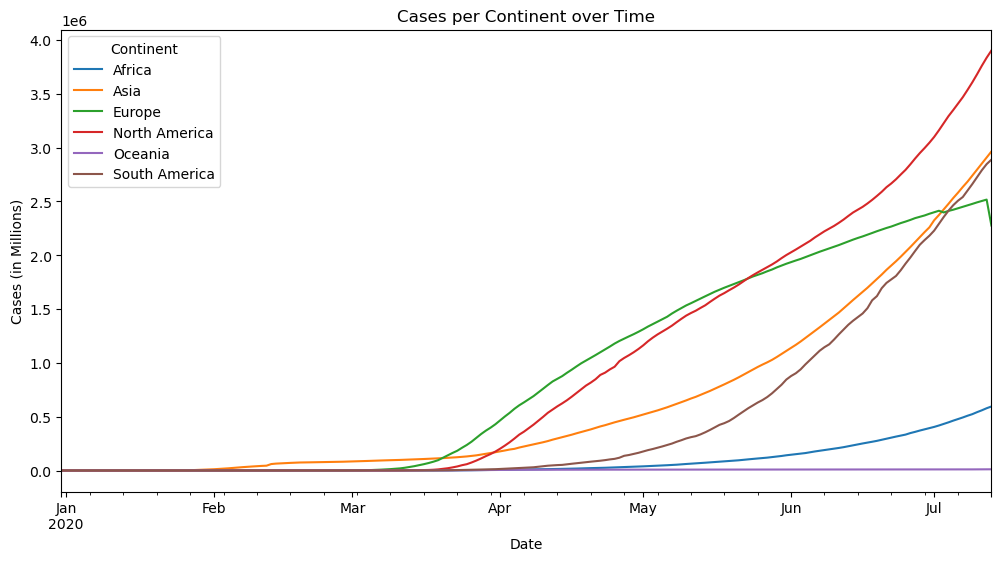

In [4]:
continent_cases = data.groupby(['date', 'continent'])['total_cases'].sum()
continent_cases = continent_cases.unstack(fill_value=0)

continent_cases.plot(kind='line', figsize=(12,6))

plt.title('Cases per Continent over Time')
plt.xlabel('Date')
plt.ylabel('Cases (in Millions)')

plt.legend(title='Continent')
plt.show()

### Creating a line graph of deaths over time per continent.
This shows how and when the total volume of deaths attributed to Covid-19 accumulated in each continent.

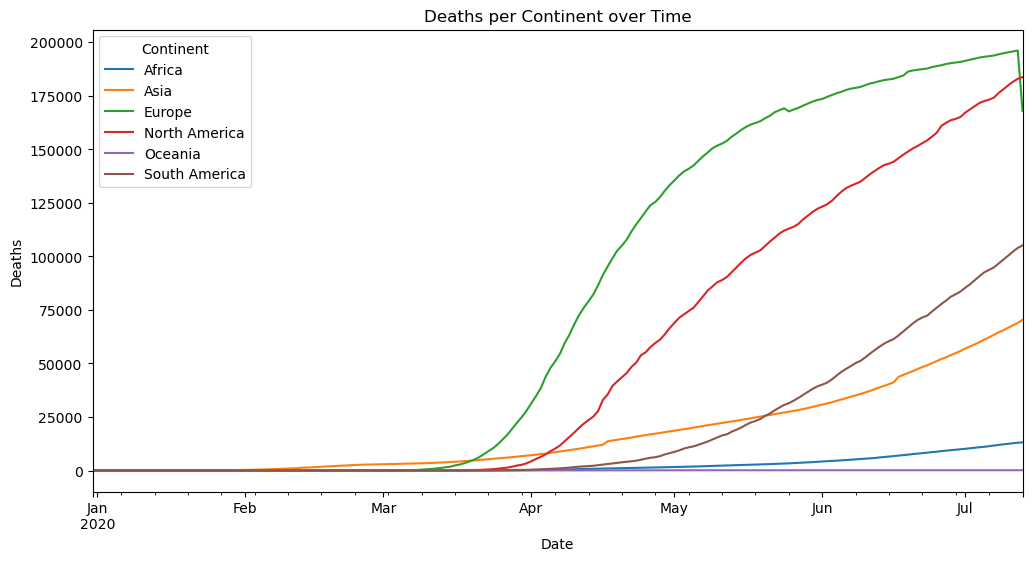

In [5]:
continent_deaths = data.groupby(['date', 'continent'])['total_deaths'].sum()
continent_deaths = continent_deaths.unstack(fill_value=0)

continent_deaths.plot(kind='line', figsize=(12,6))

plt.title('Deaths per Continent over Time')
plt.xlabel('Date')
plt.ylabel('Deaths')

plt.legend(title='Continent')
plt.show()

### Creating a heatmap of the relevant data.
This enables the reader to see at a glance which pairs of variables are strongly correlated with each other.
From this point onwards, the data as it stood for 1st July 2020 is being investigated.

Text(0.5, 1.0, 'Heatmap of the correlation matrix')

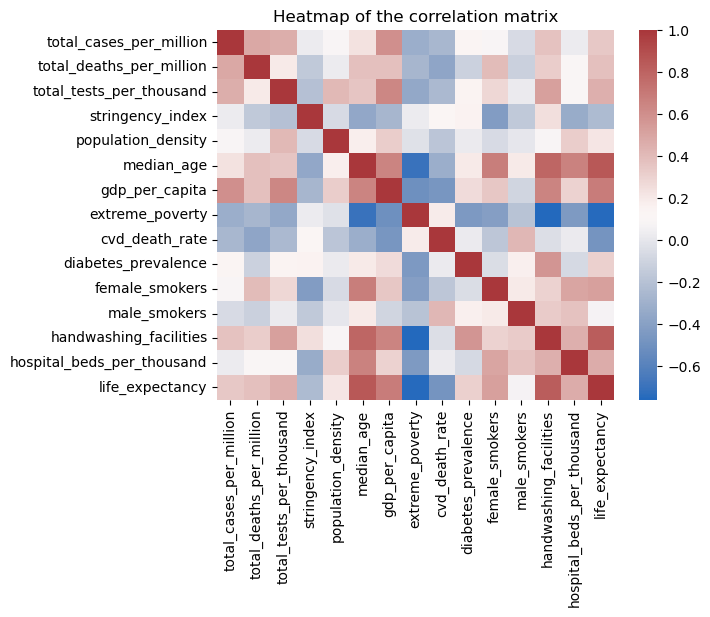

In [6]:
first_july_data = data[data['date'] == '2020-07-01']
correlation_matrix = first_july_data[['total_cases_per_million', 'total_deaths_per_million', 'total_tests_per_thousand'
                                      , 'stringency_index', 'population_density','median_age', 'gdp_per_capita'
                                      , 'extreme_poverty', 'cvd_death_rate', 'diabetes_prevalence', 'female_smokers'
                                      , 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand'
                                      , 'life_expectancy' ]].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=False, cmap='vlag').set_title('Heatmap of the correlation matrix')

### Importing additional data.
Data has been collected from the World Bank which categorises countries into an income level group, based on their gross national income per capita in 2020.
This categorisation is then joined with the original data.

In [7]:
income_levels = pd.read_csv('data/country_income_levels.csv')
income_levels['Country Code'] = income_levels['Country Code'].str.replace('"', '', regex=True)
income_levels = income_levels.set_index('Country Code')

first_july_data_indexed = first_july_data.set_index('iso_code')

first_july_income_data = pd.concat([first_july_data_indexed, income_levels['IncomeGroup']], axis=1).reindex(first_july_data_indexed.index)

Creating a colour palette dictionary for the income levels.

In [8]:
my_palette = {'Low income': 'Red', 'Lower middle income': 'Orange', 'Upper middle income': 'Yellow', 'High income': 'Green'}

### Creating scatter plots 

These scatter plots contain a regression model for each group of countries of each income level.

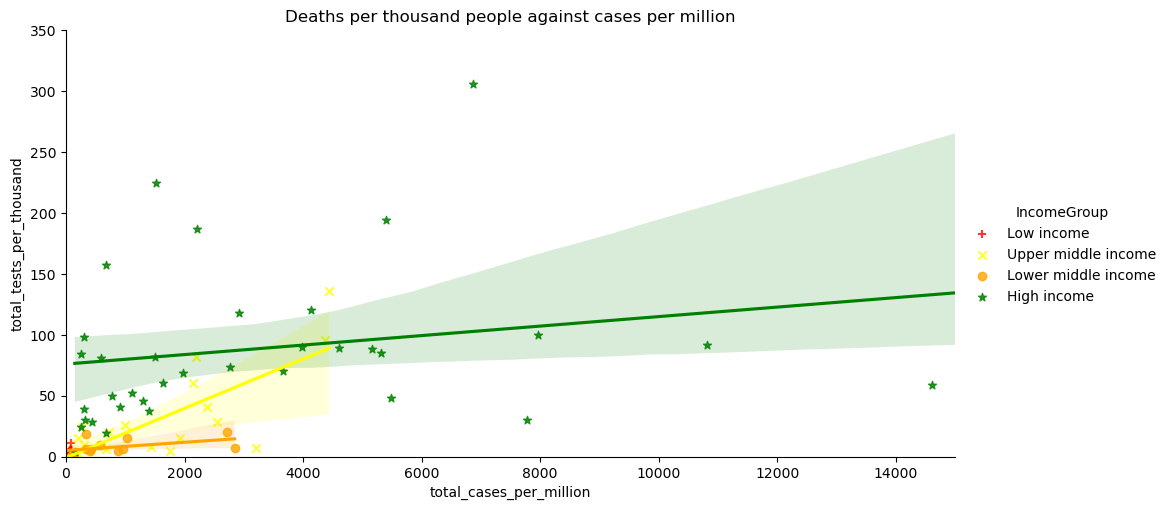

In [9]:
scatter1 = sns.lmplot(data=first_july_income_data, x='total_cases_per_million', y='total_tests_per_thousand'
                      , hue='IncomeGroup',palette=my_palette, markers=['+', 'x', 'o', '*'], height=5, aspect=2)
scatter1.set(ylim=(0, 350), xlim=(0, 15000), title='Deaths per thousand people against cases per million')

It can be seen that in general there is a positive correlation between a the number of tests and number of cases per capita. Whilst it may have been assumed that a higher number of tests would lead to fewer cases (due to a requirement to isolate in most countries after a positive test), this is clearly not the case.

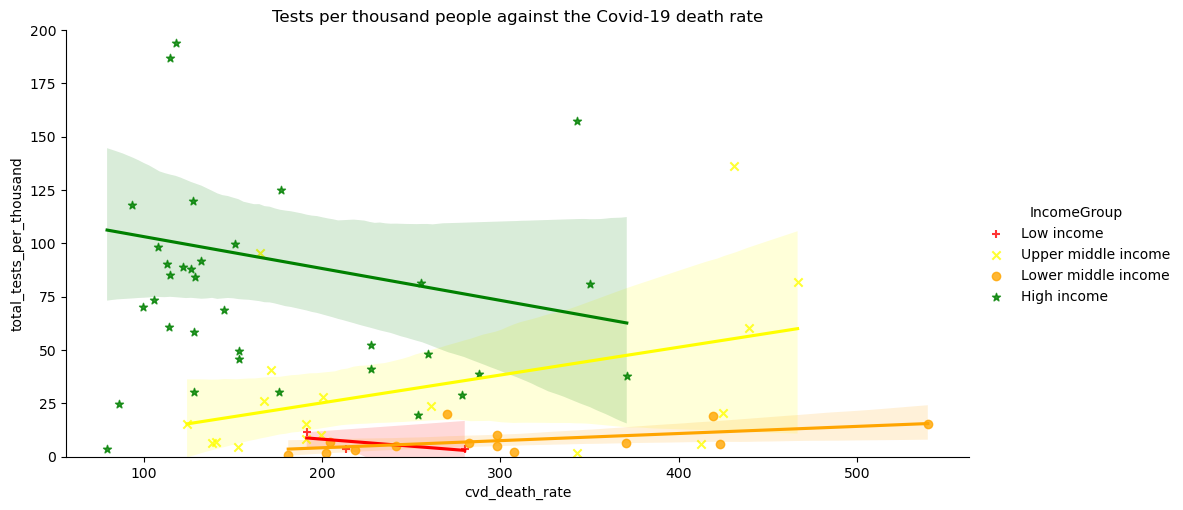

In [10]:
scatter2 = sns.lmplot(data=first_july_income_data, x='cvd_death_rate', y='total_tests_per_thousand'
                      , hue='IncomeGroup', palette=my_palette, markers=['+', 'x', 'o', '*'], height=5, aspect=2)
scatter2.set(ylim=(0, 200), title='Tests per thousand people against the Covid-19 death rate')

This graph shows that in wealthy countries, taking more tests has led to a lower death rate. However in middle income countries, the higher the rate of testing, the higher the death rate is.

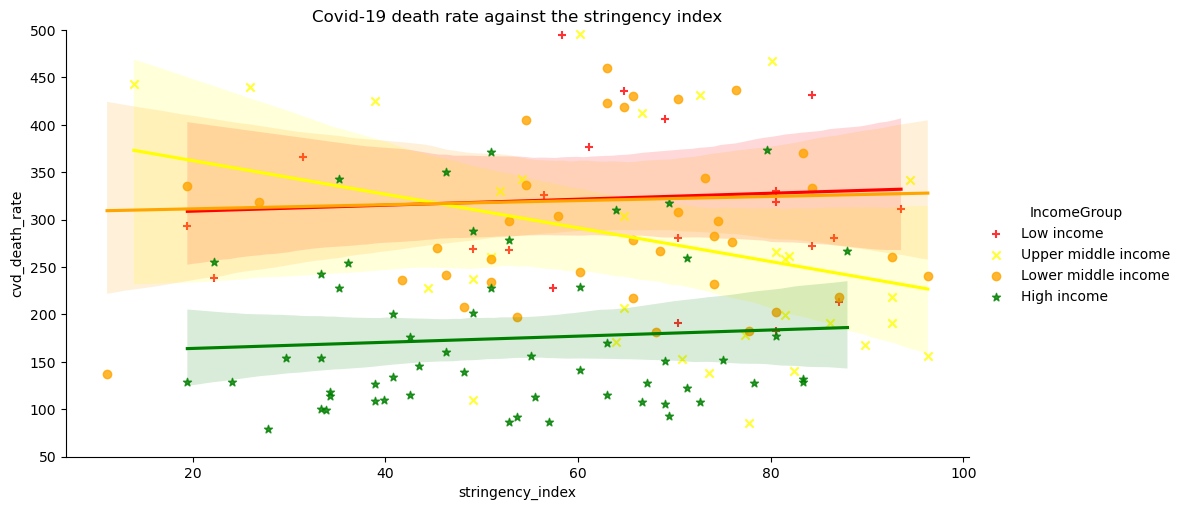

In [11]:
scatter3 = sns.lmplot(data=first_july_income_data, y='cvd_death_rate', x='stringency_index'
                      , hue='IncomeGroup', palette=my_palette, markers=['+', 'x', 'o', '*'], height=5, aspect=2)
scatter3.set(ylim=(50,500), title='Covid-19 death rate against the stringency index')

The stringency index is a composite measure from 0-100 of 9 response metrics (eg. travel bans, school closures, etc.). A higher score indicates a stricter response to the pandemic.

This graph shows that the corellation between the stringency index and Covid-19 death rate was weak. This could have been caused by a mix of factors, since a strict response likely did cause some reduction in the death rate in lots of countries, however the countries that did implement strict measures were likely reacting to a high death rate there.

It appears to show that implementing strict measures worked best at lowering the death rate in upper middle income countries.